# sequence analysis using pysan

this notebook is using pysan https://pysan.org/

In [32]:
import pysan as ps
import pandas as pd

communication_content_df = pd.read_csv(r'D:\Projects\UG-league-project\data\coded-transcripts\team-[34].csv')

communication_content_column = communication_content_df.iloc[:, 4]
communication_codes = list(communication_content_column.values)

print(communication_codes)

[14, 14, 14, 17, 0, 1, 4, 13, 17, 3, 3, 3, 17, 5, 6, 7, 17, 9, 17, 18, 5, 3, 3, 0, 17, 17, 7, 17, 16, 17, 7, 3, 16, 16, 17, 2, 5, 5, 6, 17, 17, 3, 19, 19, 5, 6, 0, 7, 17, 19, 18, 17, 3, 17, 18, 17, 17, 5, 6, 3, 17, 9, 9, 9, 5, 6, 4, 17, 3, 5, 6, 4, 16, 17, 3, 18, 16, 3, 13, 18, 3, 18, 16, 18, 16, 17, 16, 5, 17, 9, 9, 9, 3, 16, 19, 19, 17, 17, 7, 17, 18, 18, 18, 9, 9, 17, 17, 9, 17, 7, 7, 7, 7, 3, 17, 16, 18, 13, 18, 4, 18, 17, 4, 17, 16, 3, 19, 17, 0, 19, 5, 7, 18, 18, 18, 17, 17, 17, 17, 19, 19, 18, 5, 5, 6, 6, 5, 6, 5, 6, 3, 16, 17, 16, 7, 3, 16, 16, 17, 1, 16, 17, 3, 18, 18, 18, 4, 4, 17, 7, 13, 18, 16, 3, 3, 5, 4, 8, 17, 7, 2, 16, 17, 17, 2, 18, 17, 0, 0, 3, 5, 3, 3, 5, 6, 16, 17, 0, 3, 17, 18, 3, 9, 4, 3, 5, 17, 18, 18, 16, 16, 16, 7, 16, 3, 3, 17, 14, 17]


In [33]:
#export
def get_unique_ngrams(sequence, n):
    "Creates a list of all unique ngrams found in a given sequence."
    unique_ngrams = []
    for x in range(len(sequence) -  n + 1):
        this_ngram = sequence[x:x + n]

        if str(this_ngram) not in unique_ngrams:
            unique_ngrams.append(str(this_ngram))

    return [eval(x) for x in unique_ngrams]

In [42]:
unique_bigrams = get_unique_ngrams(communication_codes, 2)
total_unique_bigrams = len(unique_bigrams)

unique_trigrams = get_unique_ngrams(communication_codes, 3)
total_unique_trigrams = len(unique_trigrams)

unique_quadgrams = get_unique_ngrams(communication_codes, 4)
total_unique_quadgrams = len(unique_quadgrams)

print("unique bigrams = ", unique_bigrams, " total unique bigrams = ", total_unique_bigrams)
print(" ")
print("unique trigrams = ", unique_trigrams, " total unique trigrams = ", total_unique_trigrams)
print(" ")
print("unique quadgrams = ", unique_quadgrams, " total unique quadgrams = ", total_unique_quadgrams)

unique bigrams =  [[14, 14], [14, 17], [17, 0], [0, 1], [1, 4], [4, 13], [13, 17], [17, 3], [3, 3], [3, 17], [17, 5], [5, 6], [6, 7], [7, 17], [17, 9], [9, 17], [17, 18], [18, 5], [5, 3], [3, 0], [0, 17], [17, 17], [17, 7], [17, 16], [16, 17], [7, 3], [3, 16], [16, 16], [17, 2], [2, 5], [5, 5], [6, 17], [3, 19], [19, 19], [19, 5], [6, 0], [0, 7], [17, 19], [19, 18], [18, 17], [6, 3], [9, 9], [9, 5], [6, 4], [4, 17], [3, 5], [4, 16], [3, 18], [18, 16], [16, 3], [3, 13], [13, 18], [18, 3], [16, 18], [16, 5], [5, 17], [9, 3], [16, 19], [19, 17], [18, 18], [18, 9], [7, 7], [18, 13], [18, 4], [4, 18], [17, 4], [0, 19], [5, 7], [7, 18], [6, 6], [6, 5], [16, 7], [17, 1], [1, 16], [4, 4], [7, 13], [5, 4], [4, 8], [8, 17], [7, 2], [2, 16], [2, 18], [0, 0], [0, 3], [6, 16], [3, 9], [9, 4], [4, 3], [7, 16], [17, 14]]  total unique bigrams =  90
 
unique trigrams =  [[14, 14, 14], [14, 14, 17], [14, 17, 0], [17, 0, 1], [0, 1, 4], [1, 4, 13], [4, 13, 17], [13, 17, 3], [17, 3, 3], [3, 3, 3], [3, 3, 

In [43]:
#export
def get_ngram_counts(sequence, n):
    "Computes the prevalence of ngrams in a sequence, returning a dictionary where each key is an ngram, and each value is the number of times that ngram appears in the sequence."

    ngrams = get_unique_ngrams(sequence, n)

    ngram_counts = {str(i):0 for i in ngrams}    

    for x in range(len(sequence) -  n + 1):
        this_ngram = sequence[x:x + n]
        ngram_counts[str(this_ngram)] += 1

    return ngram_counts

In [54]:
#export
import matplotlib.pyplot as plt
def plot_ngram_counts(sequence, n):
    "Plots the number of occurances of ngrams in a given sequence."

    ngram_counts = get_ngram_counts(sequence, n)
    ngram_counts = {k: ngram_counts[k] for k in sorted(ngram_counts, key=ngram_counts.get)}

    xdata = [key[1:len(key)-1].replace(', ', ', ') for key,value in ngram_counts.items()]
    ydata = [value for key,value in ngram_counts.items()]

    plt.figure(figsize=(20, 20))
    plt.barh(xdata[-10:], ydata[-10:], label=str(n) +'-gram')
    plt.xlabel('Number of Occurances')
    plt.gca().yaxis.grid(False)
    plt.legend()
    return plt

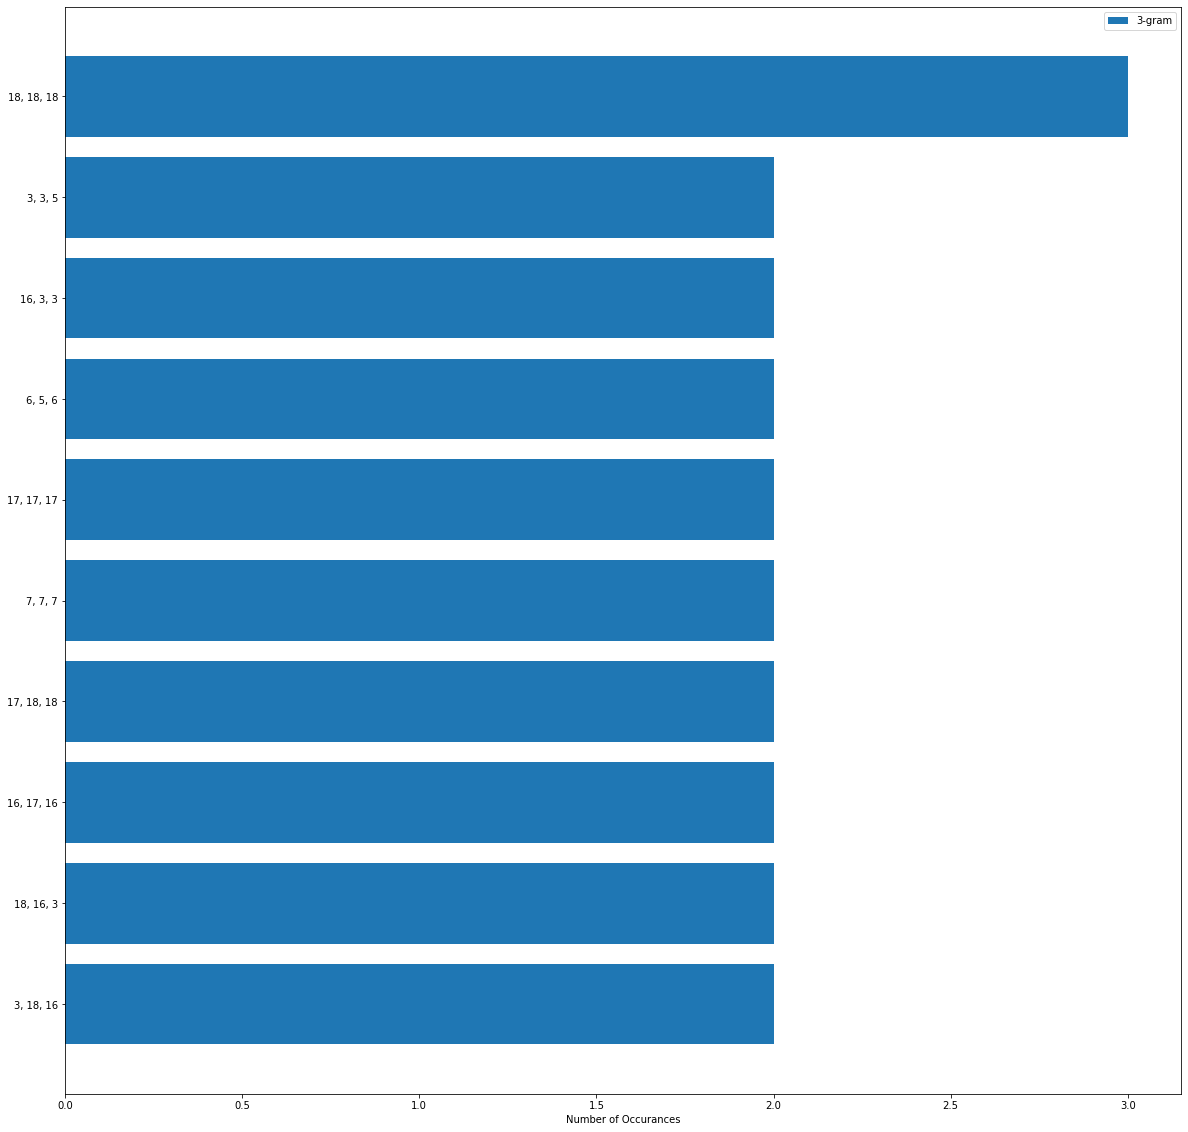

In [55]:

plt_trigrams = plot_ngram_counts(communication_codes, 3)

plt_trigrams.show()

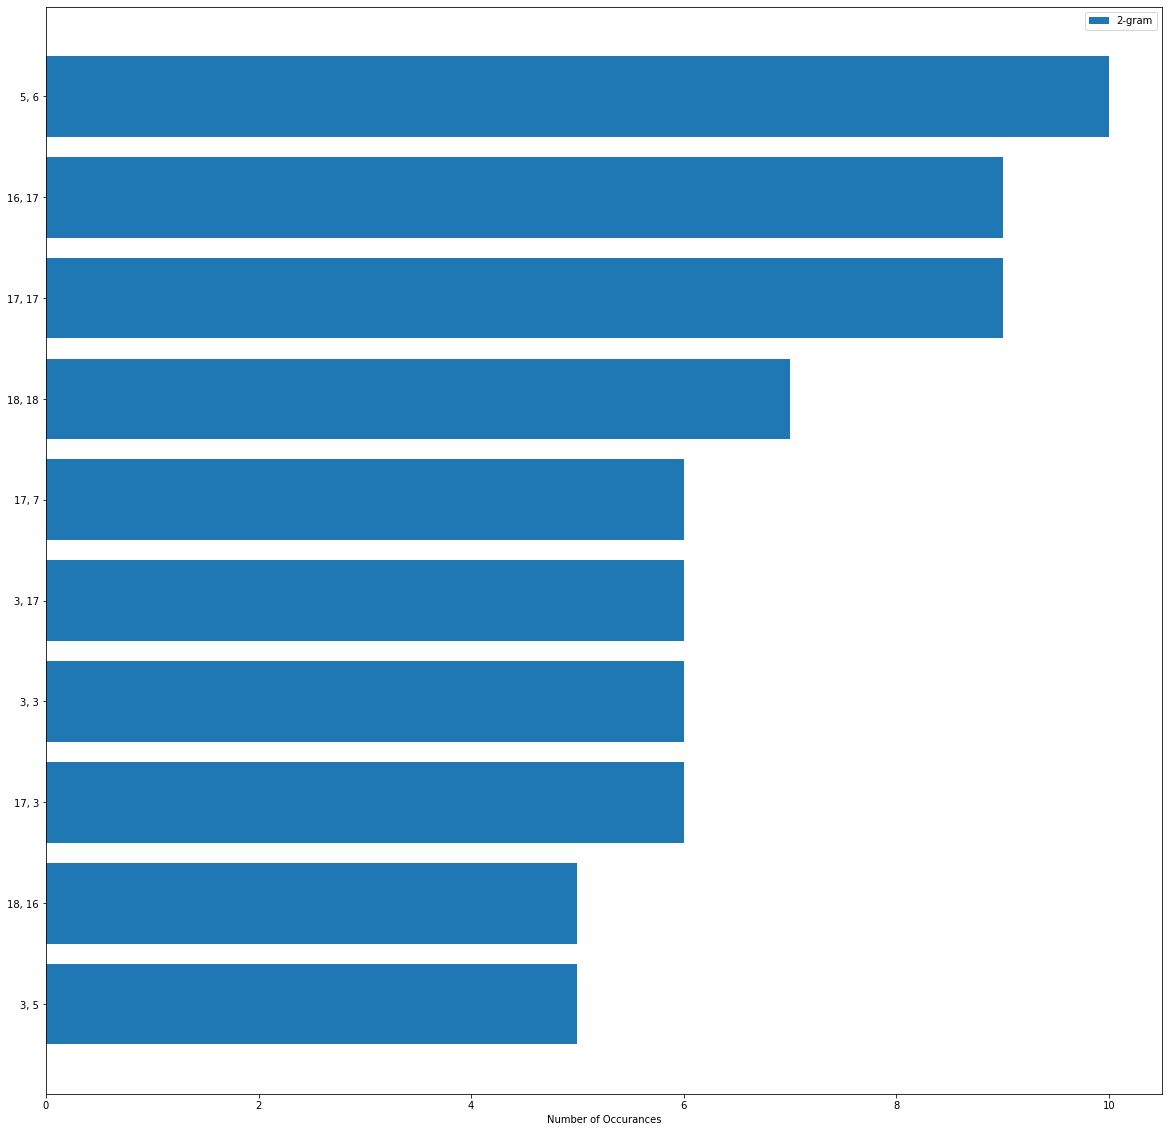

In [56]:
plt_bigrams = plot_ngram_counts(communication_codes, 2)

plt_bigrams.show()